<a href="https://colab.research.google.com/github/LauraIran7/DeCeroaCienGen2022-01/blob/main/Titanic_Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica Titanic**


In [17]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.0 MB/s 
     |████████████████████████████████| 1.0 MB 62.3 MB/s 
     |████████████████████████████████| 1.7 MB 38.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 64.1 MB/s 
     |████████████████████████████████| 6.3 MB 22.1 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=ef90c2efe600ce6e363f613dc1171055c2096283a9edd1b6940691d7554e1c57
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=efada8f918a793870c4769e2842fe853f194457a2df0ddf344dd27a7d374607b
  Stored in directory: /root/.

In [24]:
#Importacion de librerias
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [20]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [21]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
print(df[df['population']<600])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
7        -114.59     34.83                41.0        812.0           168.0   
12       -114.61     34.84                48.0       1291.0           248.0   
17       -114.65     32.79                21.0         44.0            33.0   
...          ...       ...                 ...          ...             ...   
16963    -124.16     40.79                52.0       1264.0           277.0   
16969    -124.17     40.80                52.0        661.0           316.0   
16982    -124.18     40.62                35.0        952.0           178.0   
16992    -124.23     40.81                52.0       1112.0           209.0   
16994    -124.25     40.28                32.0       1430.0           419.0   

       population  households  median_income  media

In [10]:
df2=df[df['population']<600]
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
12,-114.61,34.84,48.0,1291.0,248.0,580.0,211.0,2.1571,48600.0
17,-114.65,32.79,21.0,44.0,33.0,64.0,27.0,0.8571,25000.0


In [13]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,-119.975099,36.214574,31.422117,889.518503,181.072719,383.347246,151.849828,3.886423,211176.067556
std,2.068206,2.255128,13.383365,600.592611,118.523153,161.337963,75.733550,2.308680,132239.065504
min,-124.250000,32.570000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-122.010000,34.020000,20.000000,497.750000,110.000000,269.750000,97.000000,2.333300,106750.000000
50%,-120.160000,36.970000,33.000000,857.000000,172.500000,416.000000,155.000000,3.360700,175000.000000
75%,-118.177500,37.940000,42.000000,1169.250000,229.250000,520.000000,203.250000,4.820275,279925.000000
max,-114.560000,41.820000,52.000000,7744.000000,1573.000000,599.000000,399.000000,15.000100,500001.000000


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 2 to 16994
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2324 non-null   float64
 1   latitude            2324 non-null   float64
 2   housing_median_age  2324 non-null   float64
 3   total_rooms         2324 non-null   float64
 4   total_bedrooms      2324 non-null   float64
 5   population          2324 non-null   float64
 6   households          2324 non-null   float64
 7   median_income       2324 non-null   float64
 8   median_house_value  2324 non-null   float64
dtypes: float64(9)
memory usage: 181.6 KB


In [25]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Coordinates
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,POINT (-114.31 34.19)
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,POINT (-114.47 34.4)
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,POINT (-114.56 33.69)
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,POINT (-114.57 33.64)
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,POINT (-114.57 33.57)


In [26]:
map_data = gpd.GeoDataFrame(df, geometry="Coordinates")
map_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Coordinates
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,POINT (-114.31000 34.19000)
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,POINT (-114.47000 34.40000)
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,POINT (-114.56000 33.69000)
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,POINT (-114.57000 33.64000)
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,POINT (-114.57000 33.57000)


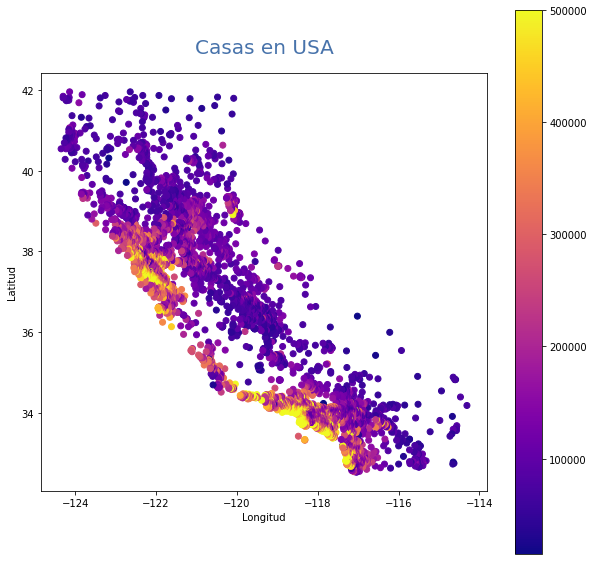

In [28]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Casas en USA', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
map_data.plot(column='median_house_value', cmap='plasma', ax=ax, zorder=5, legend=True)

In [ ]:
print("hola")

hola
